<a href="https://colab.research.google.com/github/omah03/MedicalCostPredictor/blob/main/Medical_Cost_Personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing required libraries

In [147]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Preprocessing  the dataset

In [148]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a coloumn transformer
ct = make_column_transformer(
    (StandardScaler(),["age","bmi","children"]),#Turn the values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
    )
#Create X and Y
X = insurance.drop("charges",axis =1)
y = insurance["charges"]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Fit column transformer to out training data
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScalar)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal

array([[ 0.47222651, -1.75652513,  0.73433626, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.54331294, -1.03308239, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8987451 , -0.94368672, -0.91119211, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       [-0.16755139,  2.82086429,  0.73433626, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.1120044 , -0.10932713, -0.91119211, ...,  0.        ,
         0.        ,  1.        ]])

###Building a feedforward neural network

In [149]:
#EarlyStoppingCallback
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)
tf.random.set_seed(42)
#1. Creating the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

#Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                          metrics =["mae"])
history = insurance_model_3.fit(X_train_normal,y_train,epochs=2000,callbacks=[callback],verbose=1)

Epoch 1/2000
34/34 [==============================] - 1s 3ms/step - loss: 13343.9629 - mae: 13343.9629
Epoch 2/2000
34/34 [==============================] - 0s 2ms/step - loss: 13337.1924 - mae: 13337.1924
Epoch 3/2000
34/34 [==============================] - 0s 2ms/step - loss: 13320.6016 - mae: 13320.6016
Epoch 4/2000
34/34 [==============================] - 0s 2ms/step - loss: 13285.8525 - mae: 13285.8525
Epoch 5/2000
34/34 [==============================] - 0s 3ms/step - loss: 13223.9648 - mae: 13223.9648
Epoch 6/2000
34/34 [==============================] - 0s 3ms/step - loss: 13126.2686 - mae: 13126.2686
Epoch 7/2000
34/34 [==============================] - 0s 2ms/step - loss: 12984.4717 - mae: 12984.4717
Epoch 8/2000
34/34 [==============================] - 0s 3ms/step - loss: 12790.7998 - mae: 12790.7998
Epoch 9/2000
34/34 [==============================] - 0s 2ms/step - loss: 12537.1631 - mae: 12537.1631
Epoch 10/2000
34/34 [==============================] - 0s 3ms/step - loss

In [150]:
#Evaluate model 3
insurance_model_3.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3163.7737 - mae: 3163.7737


[3163.773681640625, 3163.773681640625]

Text(0.5, 0, 'epochs')

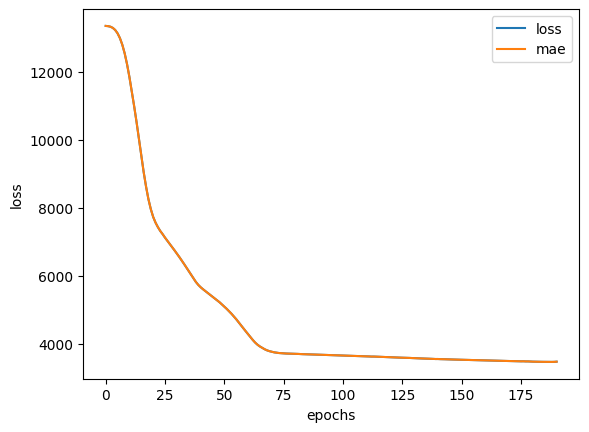

In [151]:
#Plot history (loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

9/9 [==============================] - 0s 4ms/step


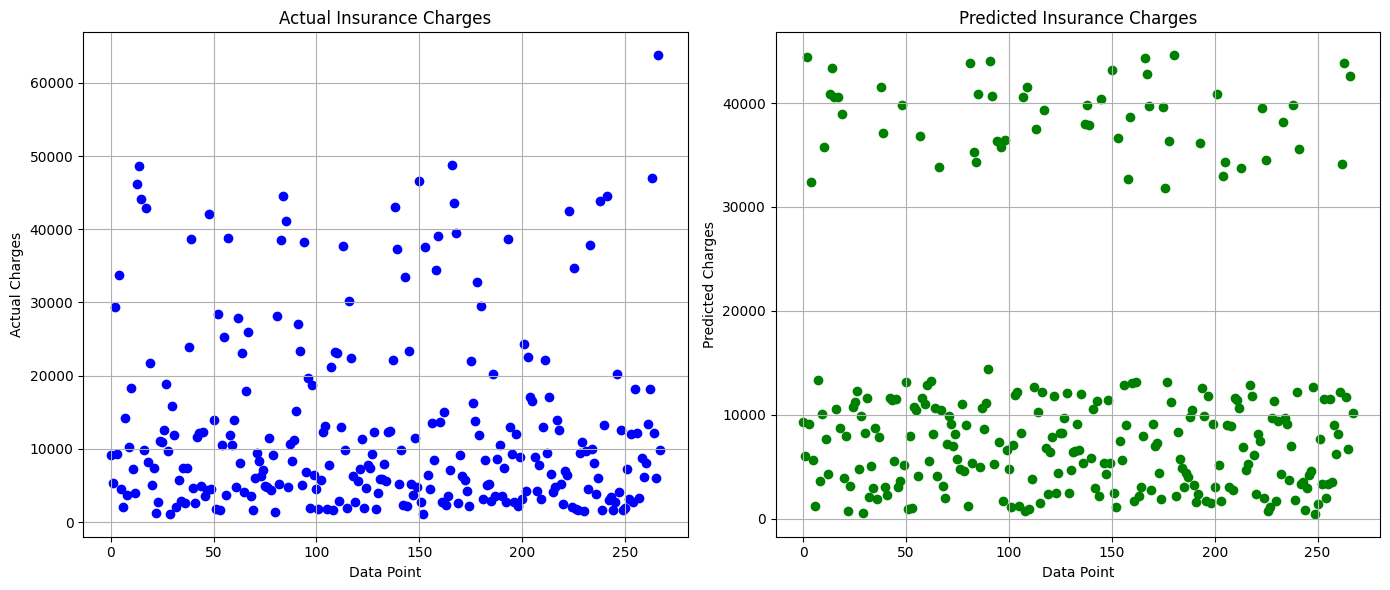

In [152]:

# Predicting on the test data
y_pred = insurance_model_3.predict(X_test_normal)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot actual values
ax1.scatter(range(len(y_test)), y_test, c='blue', label='Actual Charges')
ax1.set_xlabel('Data Point')
ax1.set_ylabel('Actual Charges')
ax1.set_title('Actual Insurance Charges')
ax1.grid(True)

# Plot predicted values
ax2.scatter(range(len(y_pred)), y_pred, c='green', label='Predicted Charges')
ax2.set_xlabel('Data Point')
ax2.set_ylabel('Predicted Charges')
ax2.set_title('Predicted Insurance Charges')
ax2.grid(True)

plt.tight_layout()
plt.show()


In [153]:
import pandas as pd

# Create a DataFrame to hold actual and predicted charges
results_df = pd.DataFrame({'Actual Charges': y_test, 'Predicted Charges': y_pred.flatten()})

# Display the DataFrame
print(results_df)


      Actual Charges  Predicted Charges
764       9095.06825        9286.881836
887       5272.17580        6015.754395
890      29330.98315       44453.277344
1293      9301.89355        9123.987305
259      33750.29180       32378.787109
...              ...                ...
109      47055.53210       43881.839844
575      12222.89830       11672.343750
535       6067.12675        6732.251953
543      63770.42801       42569.394531
846       9872.70100       10212.782227

[268 rows x 2 columns]


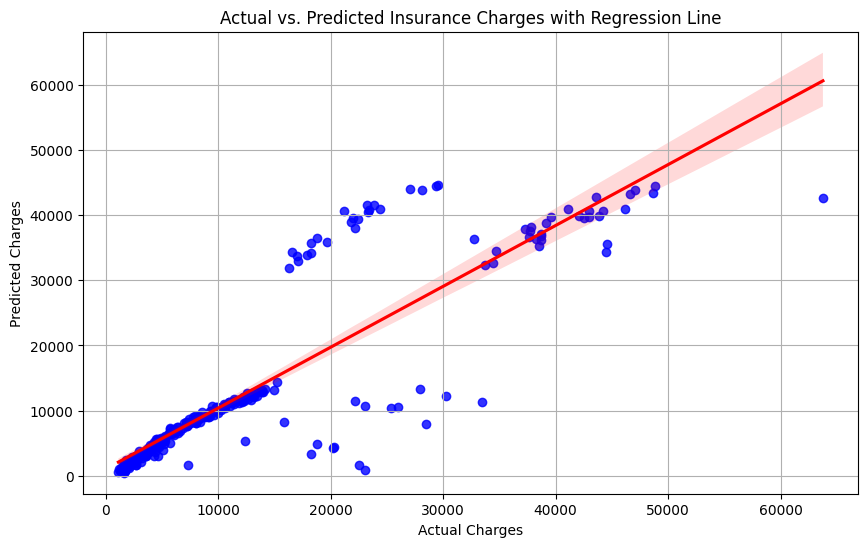

In [154]:


# Create a DataFrame for actual and predicted charges
results_df = pd.DataFrame({'Actual Charges': y_test, 'Predicted Charges': y_pred.flatten()})

# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual Charges', y='Predicted Charges', data=results_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Insurance Charges with Regression Line')
plt.grid(True)
plt.show()
